In [22]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

import os,sys
try:
    import this_is_root
except:
    os.chdir(os.path.pardir) # change workdir to be root dir
    sys.path.insert(0, os.path.realpath("."))

In [23]:
def load_pickle(file_path):
    try:
        with open(file_path, 'rb') as file:
            loaded_data = pickle.load(file)
            #print("Pickle file loaded successfully.")
            # 'loaded_data' now contains the deserialized object from the pickle file
            # print("Loaded Data:", loaded_data.keys())
    except FileNotFoundError:
        print(f"File '{file_path}' not found.")
        return None

    return loaded_data

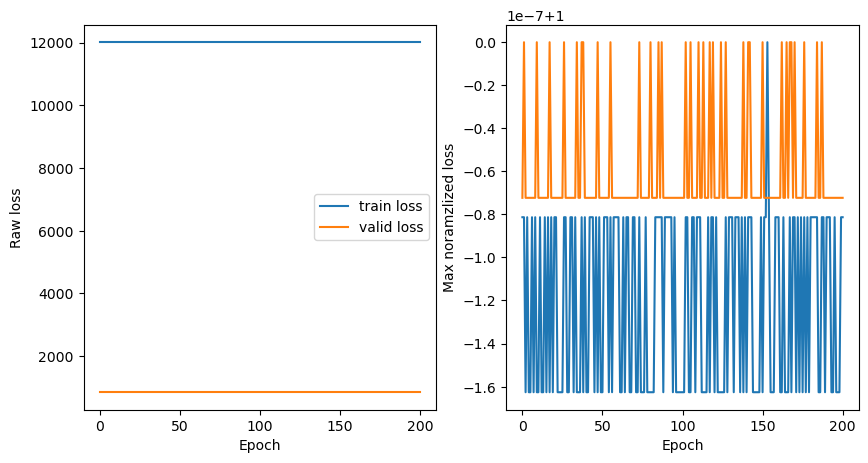

In [48]:
file_path = 'run_statistics_spot_detection_lr-0.001_seed-7single.pickle'
loaded_data = load_pickle(file_path)

NCOLS = 2
fig,axes  = plt.subplots(ncols=NCOLS, nrows=1, figsize=(NCOLS*5,5))

axes[0].plot(range(len(loaded_data['train_loss'])), loaded_data['train_loss'],label='train loss')
axes[0].plot(range(len(loaded_data['valid_loss'])), loaded_data['valid_loss'],label='valid loss')
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Raw loss")

axes[1].plot(range(len(loaded_data['train_loss'])), loaded_data['train_loss']/np.max(loaded_data['train_loss']),label='train loss')
axes[1].plot(range(len(loaded_data['valid_loss'])), loaded_data['valid_loss']/np.max(loaded_data['valid_loss']),label='valid loss')
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Max noramzlized loss")

axes[0].legend()
plt.show()

### Parameter sweep on learning rate and seed

run_statistics_spot_detection_lr-0.001_seed-0.pickle
run_statistics_spot_detection_lr-0.001_seed-7.pickle
run_statistics_spot_detection_lr-0.01_seed-0.pickle
run_statistics_spot_detection_lr-0.01_seed-7.pickle


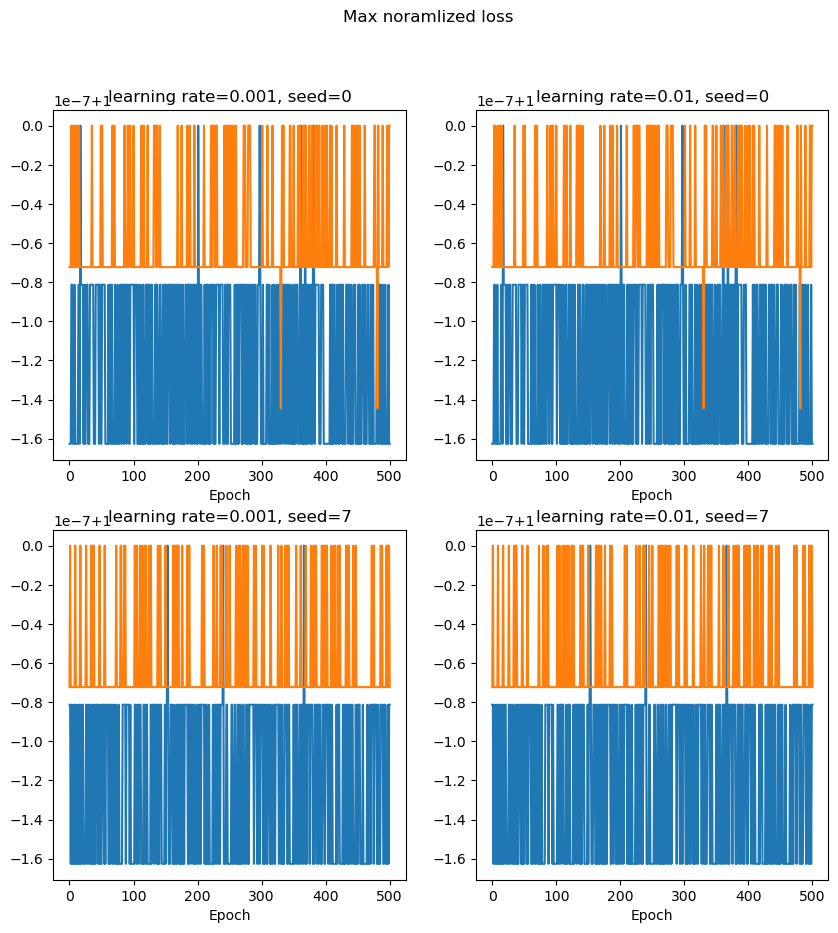

In [46]:
# learning rate change
MAX_NORMALIZE = True

learning_rates = [0.001,0.01]
seeds = [0,7]
NCOLS = len(learning_rates)
NROWS = len(seeds)
fig, axes = plt.subplots(ncols=NCOLS, nrows=NROWS, figsize=(NCOLS*5,NROWS*5))

if MAX_NORMALIZE:
    plt.suptitle("Max noramlized loss")
else:
    plt.suptitle("Raw loss")
for ii,lr in enumerate(learning_rates): # cols
    for jj,my_seed in enumerate(seeds): # rows
        params_str = 'lr-'+str(lr)+'_seed-'+str(my_seed)
        # my_file = "run_statistics_spot_detection_lr-"+str(lr)+"_seed-"+str(my_seed)+".pickle"
        my_file = 'run_statistics_spot_detection_'+params_str+'.pickle'
        p_data = load_pickle(my_file)
        print(my_file)
        if MAX_NORMALIZE:
            axes[jj,ii].plot(range(len(p_data['train_loss'])), p_data['train_loss']/np.max(p_data['train_loss']),label='train loss')
            axes[jj,ii].plot(range(len(p_data['valid_loss'])), p_data['valid_loss']/np.max(p_data['valid_loss']),label='train loss')
        else:
            axes[jj,ii].plot(range(len(p_data['train_loss'])), p_data['train_loss'],label='train loss')
            axes[jj,ii].plot(range(len(p_data['valid_loss'])), p_data['valid_loss'],label='train loss')
        axes[jj,ii].set_xlabel("Epoch")
        axes[jj,ii].set_title("learning rate="+str(lr)+", seed="+str(my_seed))

In [43]:
f2 = load_pickle("run_statistics_spot_detection_lr-0.001_seed-0.pickle")
f3 = load_pickle("run_statistics_spot_detection_lr-0.01_seed-0.pickle")
f4 = load_pickle("run_statistics_spot_detection_lr-0.01_seed-2.pickle")

In [44]:
f3['train_loss'] == f2['train_loss']

False